# Predição de Sobreviventes no Acidente do Titanic

Sumarizando tudo que estudamos até agora, vamos criar um workflow de resolução de problemas de machine learning que pode ser replicável e adaptável para qualquer dataset sobre o qual pretendemos executar um algoritmo de machine learning. O Workflow consiste em seis passos:

> Definição do problema

> Aquisição de dados de treinamento e teste

> Manipulação, preparo e limpeza dos dados

> Análise, identificação de padrão e exploração dos dados

> Modelagem, predição e resolução do problema

> Visualização e apresentação da solução final

Não é um workflow linear, visto que podemos explorar nossos dados usando visualização, ou mesmo podemos suprimir um ou outro passo ou até combinar alguns passos num só. 

## Definição do problema

A partir de um conjunto de treino que lista se os passageiros sobreviveram ou não ao desastre do Titanic, é possível criar um modelo que determine num conjunto de teste que não possui informação de sobrevivência dos passegeiros se estes sobreviveram ou não?

In [189]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Aquisição de dados

In [190]:
train_df = pd.read_csv('bases/train.csv')
test_df = pd.read_csv('bases/test.csv')
combine = [train_df, test_df] # quando for necessário aplicar operações em ambos os conjuntos

In [191]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [192]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [193]:
train_df.info()
print()
print('-'*40)
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

### Algumas observações:

> 1) Estamos lidando tanto com features numéricas quanto com features categóricas em ambos os conjuntos

> 2) Existem valores faltantes tanto no conjunto de treino quando no conjunto de teste

In [194]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Validando hipóteses

Vamos verificar algumas hipóteses aqui:
> 1) A classe do passageiro(a), seu sexo, se ele(a) possui irmãos(ãs)/conjuge ou se possui pais/filhos interfere em sua sobreviência?

> 2) A faixa de idade interfere de alguma maneira na sobrevivência?

> 3) Todas as features possuem relevância ao predizer se um determinado passageiro irá sobreviver ou não?

> 4) O título de um passageiro(a) interfere em sua sobrevivência? 

#### ToDo 1) Hipótese 1

Crie uma função que receba três parâmetros: dataset, atributo1, atributo2 (este será sempre a coluna 'Survived'). Retorne um dataframe que mostre a proporção dos que sobreviveram para cada valor presente no atributo1. Considere 'Pclass', 'sex', 'SibSp' e 'Parch' como valores possíveis para o atributo1. 

In [196]:
#Dica: filtre os dois atributos (ds[[attr1, attr2]]) e depois agrupe por attr1 e depois tire a média (como attr1 é binário, 
#a média retorna a proporção)
# Resposta
def survivors(df, column1, column2):
    records = len(df)
    filtered = df[[column1, column2]]
    grouped = filtered.groupby(column1)
    return grouped.mean()

survivors(train_df, 'Age', 'Survived')


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [197]:
import seaborn as sns
sns.set()

#### ToDo 2) Hipótese 2

Plote um histograma da variável idade para cada resultado possível da variável Survived 

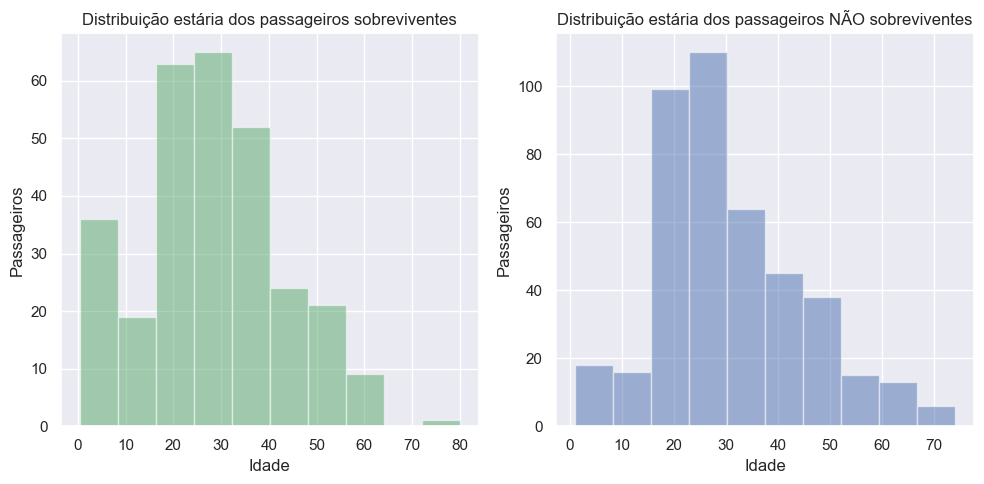

In [198]:
survived_passengers_by_age = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived_passengers_by_age = train_df[train_df['Survived'] == 0]['Age'].dropna()

plt.figure(figsize=(10, 5))  # Create a figure with a specific size

# Create the first subplot for series1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(survived_passengers_by_age, density=False, facecolor='g', alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Passageiros')
plt.title('Distribuição estária dos passageiros sobreviventes')

# Create the second subplot for series2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(not_survived_passengers_by_age, density=False, facecolor='b', alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Passageiros')
plt.title('Distribuição estária dos passageiros NÃO sobreviventes')

plt.tight_layout()  # Adjust layout for subplots
plt.show()

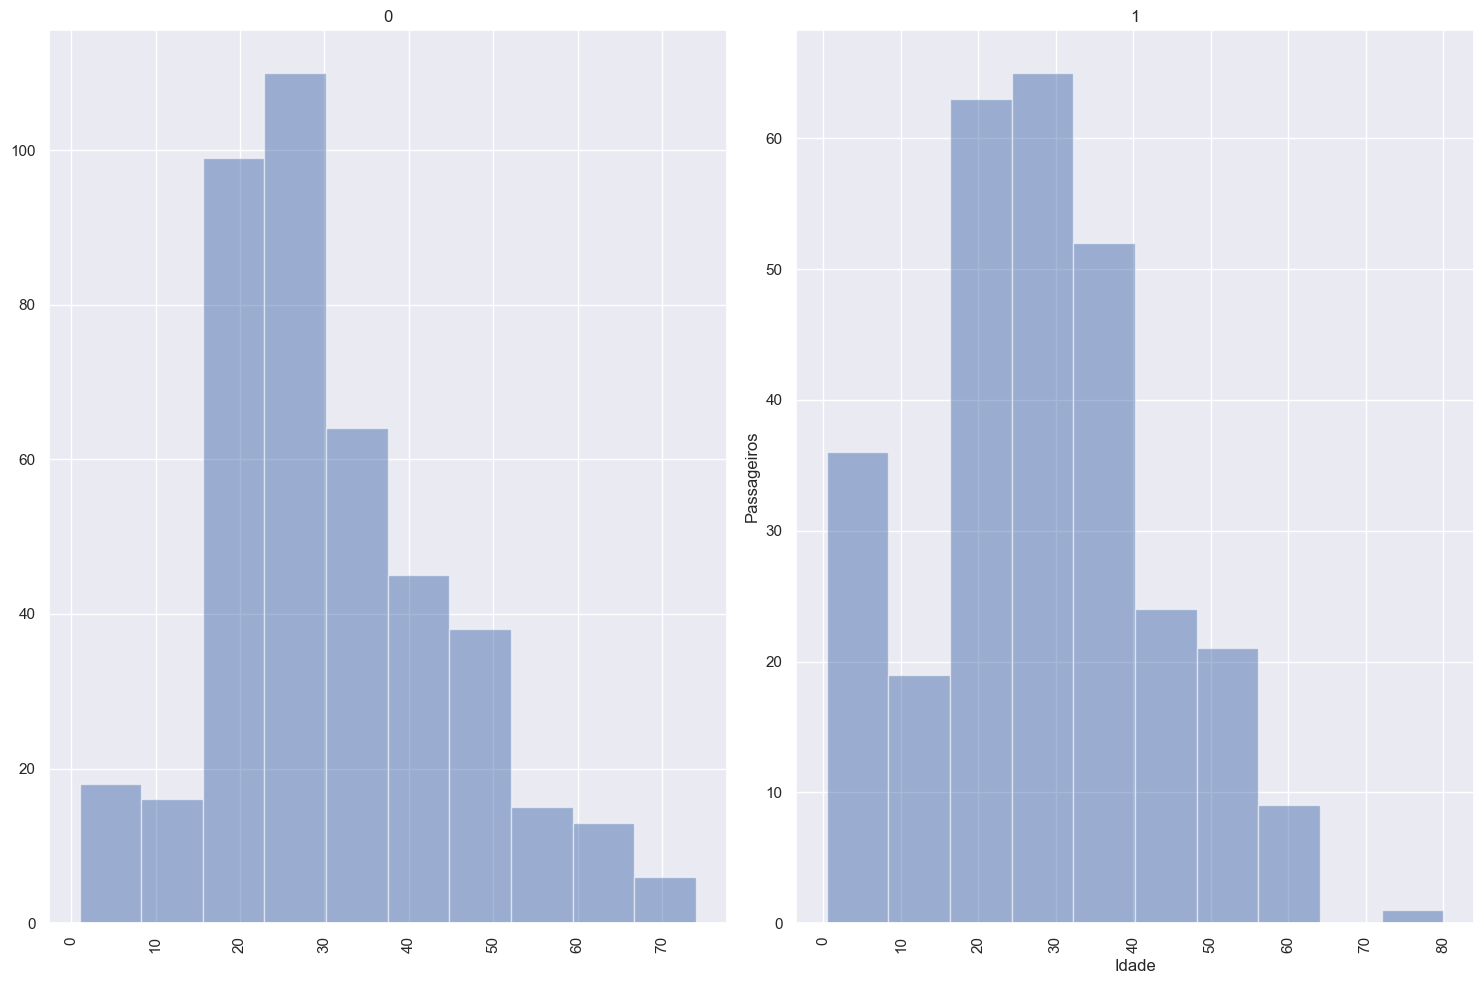

In [199]:
survived_passengers_by_age = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived_passengers_by_age = train_df[train_df['Survived'] == 0]['Age'].dropna()

train_df.hist(column = 'Age', by = 'Survived', density=False, facecolor='b', alpha=0.5, figsize=(15, 10))
plt.xlabel('Idade')
plt.ylabel('Passageiros')

plt.tight_layout()  # Adjust layout for subplots
plt.show()

#### ToDo 3) Hipótese 3

Julgue as features que estão presentes no dataset. Caso alguma não seja considerada para predizer a sobrevivência de um passageiro, elimine-a

In [200]:
# Resposta
train_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
combine = [train_df, test_df]


#### ToDo 4) Hipótese 4
Ao analisar a coluna Name, verificamos uma série de títulos associados ao nome de um passageiro(a). Esses são os títulos presentes na coluna Name: 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Ms', 'Mme', 'Master', 'Miss', 'Mr', 'Mrs'.

Use regex para extrair os títulos a partir da coluna Name (faça para cada dataset). Insira os valores numa nova coluna chamada Title. Use Pandas.crosstab para verificar quantos passageiros de cada sexo possuem cada um dos títulos. [pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [201]:
#Dica use o método str.extract do pandas
# Resposta
train_df['Title'] = train_df['Name'].str.extract(r'(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Mlle|Ms|Mme|Master|Miss|Mr|Mrs)')
test_df['Title'] = test_df['Name'].str.extract(r'(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Mlle|Ms|Mme|Master|Miss|Mr|Mrs)')

pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,4
Don,2,0
Dr,1,3
Master,0,20
Miss,77,0
Mr,72,237
Rev,0,2


#### ToDo 5) Hipótese 4
Para cada dataset, faça as seguintes substituições na coluna Title:

> 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' por 'Rare'

> 'Mlle' por 'Miss'

> 'Ms' por 'Miss'

> 'Mme' por 'Mrs'

Verifique a porcentagem de sobrevivência para cada grupo (título).

In [202]:
#Dica: use replace para fazer as substituições e a mesma solução do ToDo 1 para encontrar a porcentagem
# Resposta
train_df['Title'] = train_df['Title'].replace('(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Dona)', 'Rare', regex=True)
train_df['Title'] = train_df['Title'].replace('(Mlle|Ms)', 'Miss', regex=True)
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs', regex=True)

test_df['Title'] = test_df['Title'].replace('(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Dona)', 'Rare', regex=True)
test_df['Title'] = test_df['Title'].replace('(Mlle|Ms)', 'Miss', regex=True)
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs', regex=True)

survivors(train_df, 'Title', 'Survived')

,Survived
Title,
Master,0.575000
Miss,0.699454
Mr,0.282092
Mrs,1.000000
Rare,0.333333


#### ToDo 6) Hipótese 4
Mapeie cada um dos título para um número: 'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5. Faça a alteração nos dois datasets

In [203]:
# Dica: use o método map
# Resposta
unique_values = train_df['Title'].unique()
title_map = {value: code for code, value in enumerate(unique_values)}

train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)

#### ToDo 7)
Agora podemos eliminar as colunas Name e PassengerId com segurança, já que não serão mais úteis para nossas análises. Elimine-as em ambos os datasets (se houver):

In [204]:
# Resposta
train_df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)

#### ToDo 8)
Mapeie os valores da coluna Sex para números: 'female':0, 'male':1. Faça a alteração em ambos os datasets

In [205]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta
unique_values = train_df['Sex'].unique()
sex_map = {value: code for code, value in enumerate(unique_values)}

train_df['Sex'] = train_df['Sex'].map(sex_map)
test_df['Sex'] = test_df['Sex'].map(sex_map)

#### ToDo 9)

Temos valores faltantes tanto em train_df quanto em test_df e isso ocorre em colunas diferentes. Assim, vamos ter que tratar cada caso de uma maneira:

Em train_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Embarked com a moda

Em test_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Fare com a mediana

In [206]:
# Resposta
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [207]:
#Verificando
print(train_df.isnull().sum())
print('-'*40)
test_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64
----------------------------------------


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

#### ToDo 10
Precisamos ajustar os valores das colunas Age e Fare para valores ordinais numéricos. O código abaixo usa pd.cut para determinar as classes numéricas. O mesmo ocorre ao executar o código subsequente, mas dessa vez estamos usando pd.qcut, visto que os valores são contínuos, o que exige a classificação por quartis

In [208]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [209]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Elimine as colunas AgeBand e FareBand depois de realizadas as operações

In [210]:
#Dica: utilize o método loc dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
# Resposta
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[train_df['Age'] > 16, 'Age'] = 1
train_df.loc[train_df['Age'] > 32, 'Age'] = 2
train_df.loc[train_df['Age'] > 48, 'Age'] = 3
train_df.loc[train_df['Age'] > 64, 'Age'] = 4

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[test_df['Age'] > 16, 'Age'] = 1
test_df.loc[test_df['Age'] > 32, 'Age'] = 2
test_df.loc[test_df['Age'] > 48, 'Age'] = 3
test_df.loc[test_df['Age'] > 64, 'Age'] = 4

train_df.loc[train_df['Fare'] <= 7, 'Fare'] = 0
train_df.loc[train_df['Fare'] > 7, 'Fare'] = 1
train_df.loc[train_df['Fare'] > 14, 'Fare'] = 2
train_df.loc[train_df['Fare'] > 31, 'Fare'] = 3

test_df.loc[test_df['Fare'] <= 7, 'Fare'] = 0
test_df.loc[test_df['Fare'] > 7, 'Fare'] = 1
test_df.loc[test_df['Fare'] > 14, 'Fare'] = 2
test_df.loc[test_df['Fare'] > 31, 'Fare'] = 3

train_df = train_df.drop(['AgeBand', 'FareBand'], axis=1)

#### ToDo 11)
Mapeie os valores da coluna Embarked para números: 'S':0, 'C':1, 'Q':2. Faça a alteração em ambos os datasets

In [211]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta
unique_values = train_df['Embarked'].unique()
embarked_map = {value: code for code, value in enumerate(unique_values)}

train_df['Embarked'] = train_df['Embarked'].map(embarked_map)
test_df['Embarked'] = test_df['Embarked'].map(embarked_map)

#### ToDo 12)
Crie uma nova coluna chamada FamilySize que será a soma de SibSp e Parch + 1(caso seja somente o(a) passageiro(a)). Depois, crie uma nova coluna chamada IsAlone, cujo valor será 0, se FamilySize for igual a 1, ou 1, caso contrário

In [212]:
#Dica: utilize loc
# Resposta
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = ~(train_df['FamilySize'] == 1) * 1

test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = ~(test_df['FamilySize'] == 1) * 1


Elimine as colunas Parch, SibSp e FamilySize, pois não vamos utilizá-las mais

In [213]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

Agora que fizemos todas as correções em nossos datasets, podemos ver como ficaram:

In [214]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,1.0,0,0,1
1,1,1,1,1.0,1.0,1,0,1
2,1,3,1,1.0,1.0,0,1,0
3,1,1,1,1.0,1.0,0,0,1
4,0,3,0,1.0,1.0,0,0,0


In [215]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,1.0,1.0,2,0,0
1,893,3,1,1.0,0.0,0,0,1
2,894,2,0,1.0,1.0,2,0,0
3,895,3,0,1.0,1.0,0,0,0
4,896,3,1,1.0,1.0,0,0,1


## Treinando nosso algoritmo

In [216]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [217]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.24

## Testando com novas amostras

Informações do passageiro:
> 1º classe: 1

> Sexo feminimo: 1

> Idade 25: 1

> Fare: 3

> Embarked: 0

> Title: 2

> isAlone: 0

In [219]:
#logreg.predict(np.array([[1,0,2,3,0,2,0]]))
#logreg.predict_proba(np.array([[3,1,4,3,0,2,1]]))
logreg.predict_proba(np.array([[1,1,1,4,2,2,0]]))

C:\Users\logonrmlocal\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00319159, 0.99680841]])

### Fiquem a vontade para testar com novas amostrar. ;)